In [32]:
!git lfs install
!git clone https://github.com/ByFan-coder/COVID-19-Big-Data-Analytics-and-Visualization.git
!cd COVID-19-Big-Data-Analytics-and-Visualization
!git lfs pull
#This block will clone our Hive-exported DWS level table to colab environment.

Git LFS initialized.
fatal: destination path 'COVID-19-Big-Data-Analytics-and-Visualization' already exists and is not an empty directory.
Not in a git repository.


1. Load all DWD and DWS level pre-precessed data into pandas' data frames from Github.

In [33]:
!cd COVID-19-Big-Data-Analytics-and-Visualization && git lfs pull
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dwd  = pd.read_csv("/content/COVID-19-Big-Data-Analytics-and-Visualization/dwd_covid_clean_full.csv")
dws1 = pd.read_csv("/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_time_series_trend.csv")
dws2 = pd.read_csv("/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_country_risk_profile.csv")
dws3 = pd.read_csv("/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_vaccine_testing_effect.csv")
dws4 = pd.read_csv("/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_policy_effectiveness.csv")
#This block load the formal data from Git LFS and load it in pandas dataframe.

Following 4 blocks are responsible for adding the column name back to table and do a preventive data cleaning in order to satisfy the type requirement of panda and matplotlib.

In [34]:
cols_dws1 = [
    "date",
    "total_cases",
    "total_deaths",
    "total_vaccinations",
    "new_cases",
    "new_deaths",
    "new_vaccinations",
    "avg_new_cases_7d",
    "avg_new_deaths_7d",
    "continent",
    "year"
]

dws1 = pd.read_csv(
    "/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_time_series_trend.csv",
    header=None,
    names=cols_dws1,
    na_values="\\N"
)

dws1["date"] = pd.to_datetime(dws1["date"], errors="coerce")
dws1.head()

,date,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,new_vaccinations,avg_new_cases_7d,avg_new_deaths_7d,continent,year
0,2021-01-01,2755392.0,65607.0,NaN,29790.0,693.0,NaN,23036.428571,580.714286,Africa,2021
1,2021-01-02,2781311.0,66274.0,NaN,25919.0,667.0,NaN,23131.571429,600.285714,Africa,2021
2,2021-01-03,2805119.0,66783.0,NaN,23808.0,509.0,NaN,23535.428571,611.857143,Africa,2021
3,2021-01-04,2827351.0,67400.0,NaN,22232.0,617.0,NaN,24096.571429,637.571429,Africa,2021
4,2021-01-05,2849156.0,68083.0,NaN,21805.0,683.0,NaN,24947.142857,657.857143,Africa,2021


In [35]:
cols_dws2 = [
    "country",
    "code",
    "total_cases",
    "total_deaths",
    "population",
    "infection_rate",
    "mortality_rate",
    "gdp_per_capita",
    "human_development_index",
    "continent",
    "year"
]

dws2 = pd.read_csv(
    "/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_country_risk_profile.csv",
    header=None,
    names=cols_dws2,
    na_values="\\N"
)

dws2["year"] = pd.to_numeric(dws2["year"], errors="coerce")
dws2.head()

,country,code,total_cases,total_deaths,population,infection_rate,mortality_rate,gdp_per_capita,human_development_index,continent,year
0,Algeria,DZA,272010.0,6881.0,45477391.0,0.005981,0.025297,11198.233398,NaN,Africa,2023
1,Angola,AGO,106928.0,1937.0,35635028.0,0.003001,0.018115,5906.115723,NaN,Africa,2023
2,Benin,BEN,28036.0,163.0,13759507.0,0.002038,0.005814,3435.171631,NaN,Africa,2023
3,Botswana,BWA,330417.0,2800.0,2439895.0,0.135423,0.008474,15518.651367,NaN,Africa,2023
4,Burkina Faso,BFA,22109.0,400.0,22509038.0,0.000982,0.018092,2158.858398,NaN,Africa,2023


In [36]:
cols_dws3 = [
    "country",
    "date",
    "people_vaccinated_per_hundred",
    "total_vaccinations",
    "new_cases",
    "new_deaths",
    "total_tests",
    "positive_rate",
    "recovery_indicator",
    "continent",
    "year"
]

dws3 = pd.read_csv(
    "/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_vaccine_testing_effect.csv",
    header=None,
    names=cols_dws3,
    na_values="\\N"
)

dws3["date"] = pd.to_datetime(dws3["date"], errors="coerce")
dws3["year"] = pd.to_numeric(dws3["year"], errors="coerce")
dws3.head()


,country,date,people_vaccinated_per_hundred,total_vaccinations,new_cases,new_deaths,total_tests,positive_rate,recovery_indicator,continent,year
0,Albania,2021-01-01,NaN,NaN,581.0,4.0,249384.0,22.035990,NaN,Europe,2021
1,Albania,2021-01-02,NaN,NaN,589.0,7.0,250409.0,22.230574,NaN,Europe,2021
2,Albania,2021-01-03,NaN,NaN,407.0,5.0,252718.0,22.323013,NaN,Europe,2021
3,Albania,2021-01-04,NaN,NaN,268.0,4.0,253999.0,22.431627,NaN,Europe,2021
4,Albania,2021-01-05,NaN,NaN,447.0,3.0,257423.0,22.346972,NaN,Europe,2021


In [37]:
cols_dws4 = [
    "country",
    "date",
    "stringency_index",
    "reproduction_rate",
    "new_cases",
    "new_deaths",
    "lag_7d_stringency",
    "lag_7d_new_cases",
    "continent",
    "year"
]

dws4 = pd.read_csv(
    "/content/COVID-19-Big-Data-Analytics-and-Visualization/dws_policy_effectiveness.csv",
    header=None,
    names=cols_dws4,
    na_values="\\N"
)

dws4["date"] = pd.to_datetime(dws4["date"], errors="coerce")
dws4["year"] = pd.to_numeric(dws4["year"], errors="coerce")
for col in ["stringency_index", "reproduction_rate", "new_cases", "new_deaths", "lag_7d_stringency", "lag_7d_new_cases"]:
    dws4[col] = pd.to_numeric(dws4[col], errors="coerce")

dws4.head()


,country,date,stringency_index,reproduction_rate,new_cases,new_deaths,lag_7d_stringency,lag_7d_new_cases,continent,year
0,Albania,2021-01-01,56.48,0.9619,581.0,4.0,56.48,503.0,Europe,2021
1,Albania,2021-01-02,56.48,0.9817,589.0,7.0,56.48,510.0,Europe,2021
2,Albania,2021-01-03,56.48,0.9962,407.0,5.0,56.48,553.0,Europe,2021
3,Albania,2021-01-04,56.48,1.0115,268.0,4.0,56.48,375.0,Europe,2021
4,Albania,2021-01-05,56.48,1.0319,447.0,3.0,56.48,499.0,Europe,2021


1. How have global COVID-19 confirmed cases and deaths evolved over time across continents?


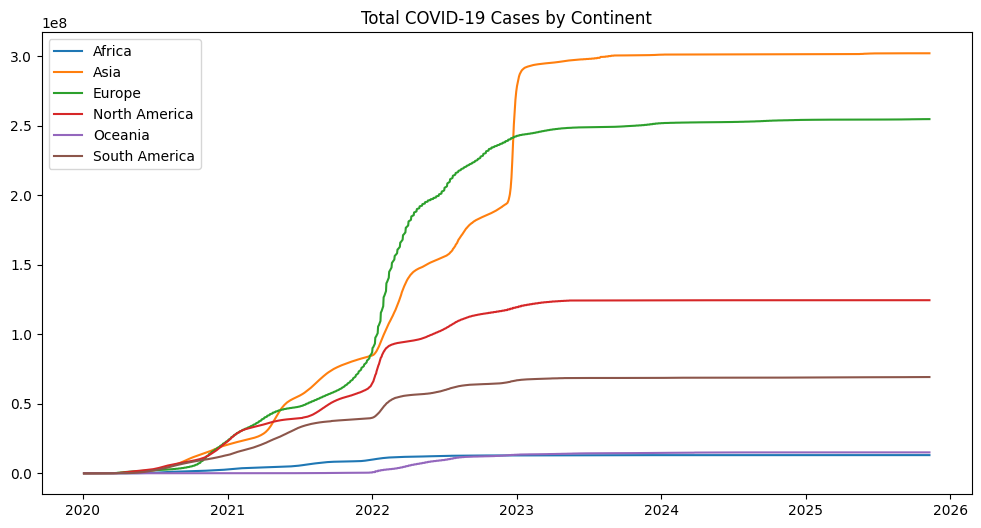

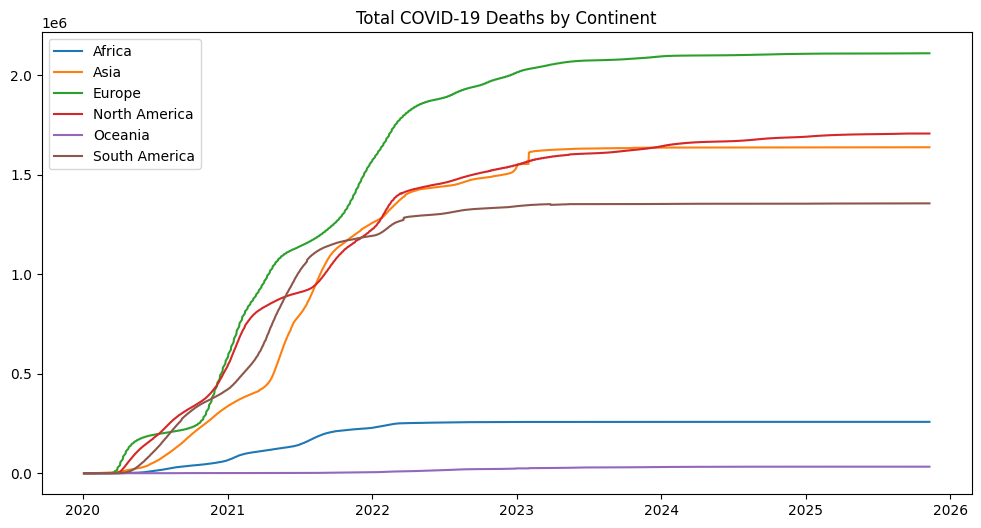

In [38]:
plt.figure(figsize=(12,6))
for c in dws1["continent"].dropna().unique():
    tmp = dws1[dws1["continent"] == c].sort_values("date")
    plt.plot(tmp["date"], tmp["total_cases"], label=c)
plt.title("Total COVID-19 Cases by Continent")
plt.legend(); plt.show()

plt.figure(figsize=(12,6))
for c in dws1["continent"].dropna().unique():
    tmp = dws1[dws1["continent"] == c].sort_values("date")
    plt.plot(tmp["date"], tmp["total_deaths"], label=c)

plt.title("Total COVID-19 Deaths by Continent")
plt.legend();
plt.show()


Q1 - Conclusion:<br>
All continents experienced very distinct peaks in the pandemic between 2020 and 2022.<br>
Starting in 2023, the global pandemic gradually entered a plateau phase and came to the end. Combined with realworld, these peaks match with different variant virus outbreaks and policy changes in China.<br>
This demonstrates that while the timing of the COVID-19 outbreaks differ slightly across different continents, the overall trend was highly consistent.


2. Which countries experienced the highest infection rates and mortality ratios?


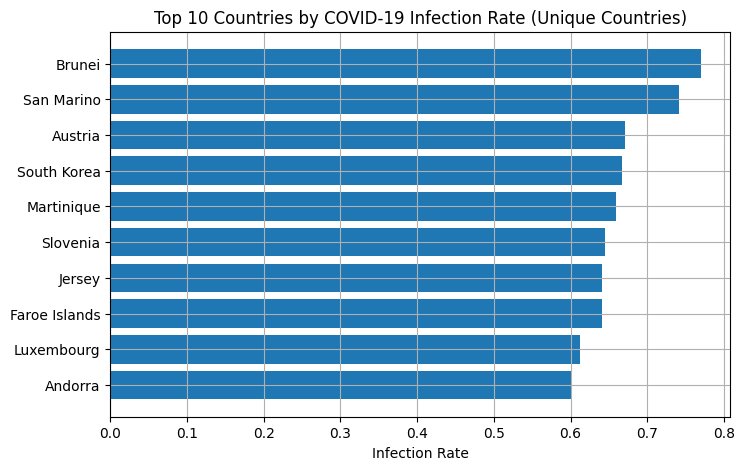

In [39]:
top10_inf = (dws2.sort_values("infection_rate", ascending=False).drop_duplicates(subset=["country"]).head(10))
top10_mor= (dws2.sort_values("mortality_rate", ascending=False).drop_duplicates(subset=["country"]).head(10))

plt.figure(figsize=(8, 5))

plt.barh(
    top10_inf["country"],
    top10_inf["infection_rate"]
)

plt.xlabel("Infection Rate")
plt.title("Top 10 Countries by COVID-19 Infection Rate (Unique Countries)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


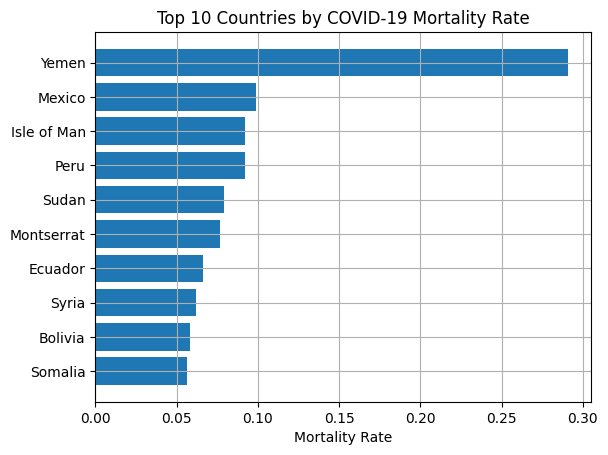

In [40]:
plt.figure()
plt.barh(
    top10_mor["country"],
    top10_mor["mortality_rate"]
)
plt.xlabel("Mortality Rate")
plt.title("Top 10 Countries by COVID-19 Mortality Rate")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [41]:
print(f"The country with the highest COVID-19 infection rate is "
f"{top10_inf.iloc[0]['country']} ({top10_inf.iloc[0]['code']}), "
f"with an infection rate of {top10_inf.iloc[0]['infection_rate']:.6f} "
f"({top10_inf.iloc[0]['infection_rate']*100:.2f}%).")

print(f"The country with the highest COVID-19 mortality rate is "
f"{top10_mor.iloc[0]['country']} ({top10_mor.iloc[0]['code']}), "
f"with a mortality rate of {top10_mor.iloc[0]['mortality_rate']:.6f} "
f"({top10_mor.iloc[0]['mortality_rate']*100:.2f}%).")

The country with the highest COVID-19 infection rate is Brunei (BRN), with an infection rate of 0.769807 (76.98%).
The country with the highest COVID-19 mortality rate is Yemen (YEM), with a mortality rate of 0.290814 (29.08%).


3. How do vaccination rates correlate with changes in confirmed cases and deaths?


Regression Analysis (Log): Vaccination v.s New Cases
Coefficient (slope): -0.000387
Intercept          : 4.87
R² Score (log)     : 0.0000


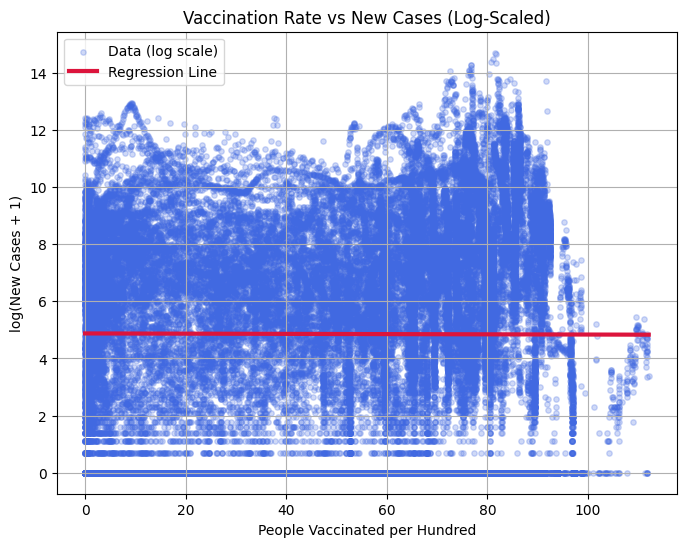

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_cases = dws3[["people_vaccinated_per_hundred", "new_cases"]].dropna()
X_cases = df_cases[["people_vaccinated_per_hundred"]]
y_cases = df_cases["new_cases"]


y_cases_log = np.log1p(y_cases)
model_cases = LinearRegression()
model_cases.fit(X_cases, y_cases_log)
y_pred_log = model_cases.predict(X_cases)
r2_cases = r2_score(y_cases_log, y_pred_log)

print("Regression Analysis (Log): Vaccination v.s New Cases")
print(f"Coefficient (slope): {model_cases.coef_[0]:.6f}")
print(f"Intercept          : {model_cases.intercept_:.2f}")
print(f"R² Score (log)     : {r2_cases:.4f}")

order = np.argsort(X_cases.values.flatten())
X_sorted = X_cases.values.flatten()[order]
y_sorted = y_pred_log[order]
plt.figure(figsize=(8, 6))

plt.scatter(
    X_cases,
    y_cases_log,
    alpha=0.25,
    s=15,
    color="royalblue",
    label="Data (log scale)"
)

plt.plot(
    X_sorted,
    y_sorted,
    color="crimson",
    linewidth=3,
    label="Regression Line"
)

plt.xlabel("People Vaccinated per Hundred")
plt.ylabel("log(New Cases + 1)")
plt.title("Vaccination Rate vs New Cases (Log-Scaled)")
plt.grid(True)
plt.legend()
plt.show()


Regression Analysis: Vaccination v.s New Deaths
Coefficient (slope): -0.974434
Intercept          : 116.35
R² Score           : 0.0102


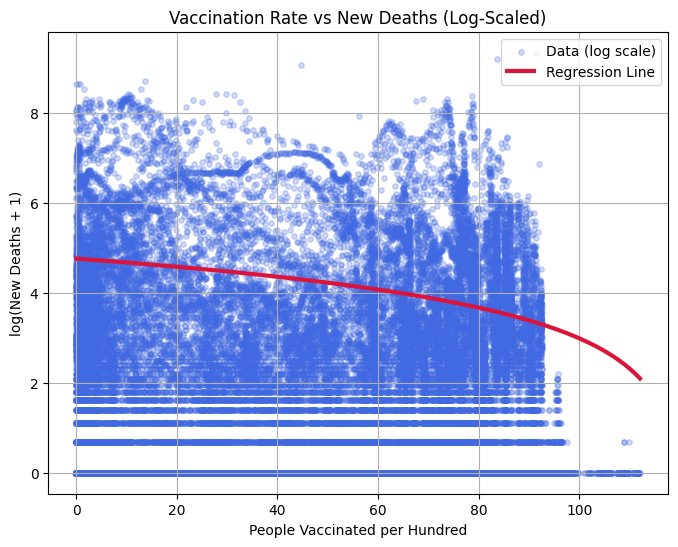

In [43]:
df_deaths = dws3[["people_vaccinated_per_hundred", "new_deaths"]].dropna()

X_deaths = df_deaths[["people_vaccinated_per_hundred"]]
y_deaths = df_deaths["new_deaths"]

model_deaths = LinearRegression()
model_deaths.fit(X_deaths, y_deaths)

y_pred_deaths = model_deaths.predict(X_deaths)

r2_deaths = r2_score(y_deaths, y_pred_deaths)

order = np.argsort(X_deaths.values.flatten())
X_sorted = X_deaths.values.flatten()[order]
y_sorted = y_pred_deaths[order]

plt.figure(figsize=(8, 6))

plt.scatter(
    X_deaths,
    np.log1p(y_deaths),
    alpha=0.25,
    s=15,
    color="royalblue",
    label="Data (log scale)"
)

plt.plot(
    X_sorted,
    np.log1p(y_sorted),
    color="crimson",
    linewidth=3,
    label="Regression Line"
)
print("Regression Analysis: Vaccination v.s New Deaths")
print(f"Coefficient (slope): {model_deaths.coef_[0]:.6f}")
print(f"Intercept          : {model_deaths.intercept_:.2f}")
print(f"R² Score           : {r2_deaths:.4f}")

plt.xlabel("People Vaccinated per Hundred")
plt.ylabel("log(New Deaths + 1)")
plt.title("Vaccination Rate vs New Deaths (Log-Scaled)")
plt.grid(True)
plt.legend()
plt.show()

In [44]:
print("Q3 Conclusion：")

print(f"For COVID-19 deaths, the log-linear regression shows a negative relationship between vaccination rate and mortality, "
f"with a slope of {model_deaths.coef_[0]:.6f} and R² = {r2_deaths:.4f}. "
f"This indicates that higher vaccination coverage is associated with lower COVID-19 death levels.")

print(f"For COVID-19 cases, the regression slope is {model_cases.coef_[0]:.6f} with R² = {r2_cases:.4f}, "
f"suggesting that vaccination rate has a very weak explanatory power for global infection fluctuations.")

Q3 Conclusion：
For COVID-19 deaths, the log-linear regression shows a negative relationship between vaccination rate and mortality, with a slope of -0.974434 and R² = 0.0102. This indicates that higher vaccination coverage is associated with lower COVID-19 death levels.
For COVID-19 cases, the regression slope is -0.000387 with R² = 0.0000, suggesting that vaccination rate has a very weak explanatory power for global infection fluctuations.


4. Which regions show the fastest vaccination progress and the strongest pandemic recovery trends?


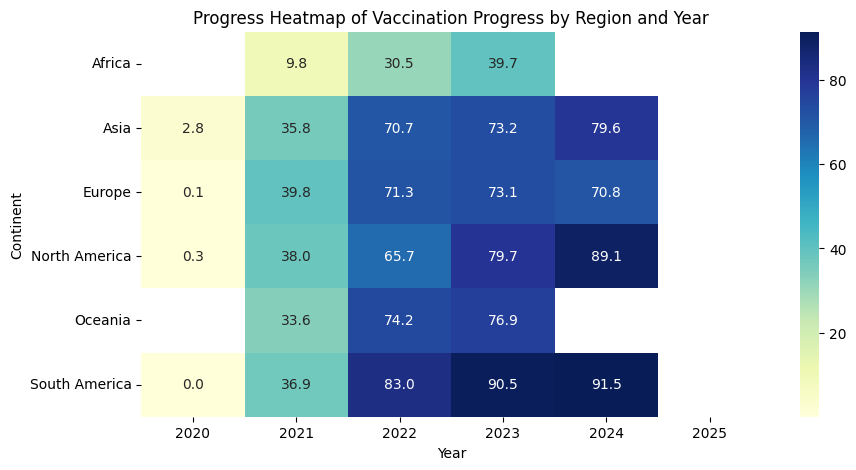

In [45]:
vax_heat = (
    dws3.groupby(["continent", "year"])["people_vaccinated_per_hundred"]
    .mean()
    .reset_index()
)

vax_pivot = vax_heat.pivot(
    index="continent",
    columns="year",
    values="people_vaccinated_per_hundred"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    vax_pivot,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu"
)

plt.title("Progress Heatmap of Vaccination Progress by Region and Year")
plt.xlabel("Year")
plt.ylabel("Continent")
plt.show()


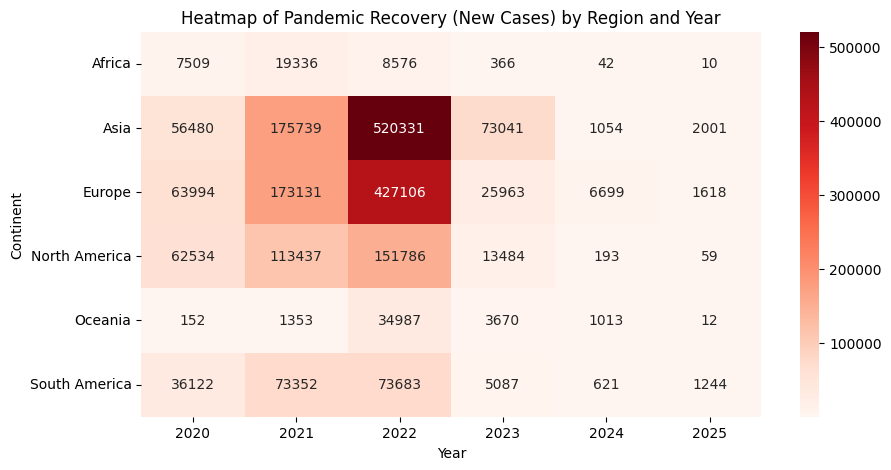

In [46]:

recovery_heat = (
    dws1.groupby(["continent", "year"])["new_cases"]
    .mean()
    .reset_index()
)

recovery_pivot = recovery_heat.pivot(
    index="continent",
    columns="year",
    values="new_cases"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    recovery_pivot,
    annot=True,
    fmt=".0f",
    cmap="Reds"
)

plt.title("Heatmap of Pandemic Recovery (New Cases) by Region and Year")
plt.xlabel("Year")
plt.ylabel("Continent")
plt.show()


In [47]:
fastest_vax = vax_heat.sort_values("people_vaccinated_per_hundred", ascending=False).head(1)

slowest_cases = recovery_heat.sort_values("new_cases").head(1)

print("Q4 Conclusion：")

print(f"The region with the fastest vaccination progress is "
f"{fastest_vax.iloc[0]['continent']} in {fastest_vax.iloc[0]['year']}, "
f"with an average vaccination rate of "
f"{fastest_vax.iloc[0]['people_vaccinated_per_hundred']:.2f}%.")

print(f"The region showing the strongest pandemic recovery is "
f"{slowest_cases.iloc[0]['continent']} in {slowest_cases.iloc[0]['year']}, "
f"with the lowest average number of new cases: "
f"{slowest_cases.iloc[0]['new_cases']:.0f}."
f"\nHowever, we also need to consider the low testing rates in Africa, which means that the actual data may not accurately reflect the reality.  \nIn other words, the low numbers of new cases in Africa are due to insufficient testing, not because the continent is truly recovering fastest from the pandemic.")


Q4 Conclusion：
The region with the fastest vaccination progress is South America in 2024, with an average vaccination rate of 91.45%.
The region showing the strongest pandemic recovery is Africa in 2025, with the lowest average number of new cases: 10.
However, we also need to consider the low testing rates in Africa, which means that the actual data may not accurately reflect the reality.  
In other words, the low numbers of new cases in Africa are due to insufficient testing, not because the continent is truly recovering fastest from the pandemic.


5. What does the time-series pattern of daily new cases, deaths, and vaccinations look like?

In [48]:
dws1["date"] = pd.to_datetime(dws1["date"], errors="coerce")

ts_global = (
    dws1.groupby("date")[["new_cases", "new_deaths", "total_vaccinations"]]
    .sum()
    .reset_index()
)

ts_global["new_cases_7d"]  = ts_global["new_cases"].rolling(7).mean()
ts_global["new_deaths_7d"] = ts_global["new_deaths"].rolling(7).mean()

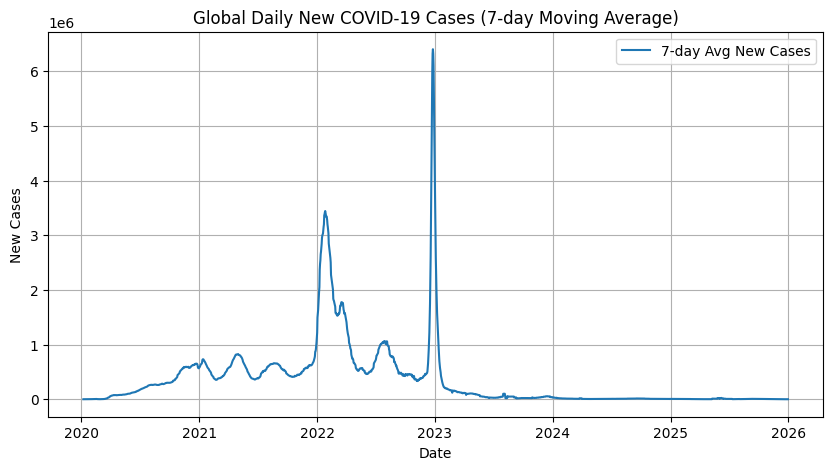

In [49]:
plt.figure(figsize=(10, 5))

plt.plot(ts_global["date"], ts_global["new_cases_7d"], label="7-day Avg New Cases")

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Global Daily New COVID-19 Cases (7-day Moving Average)")
plt.grid(True)
plt.legend()
plt.show()

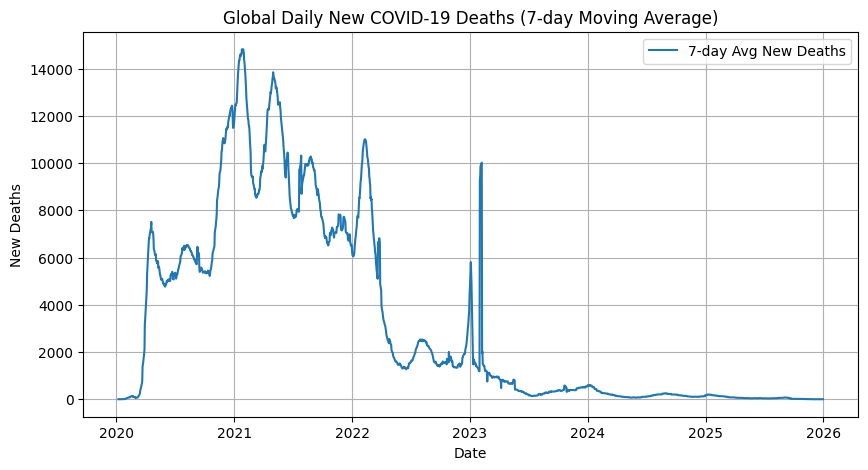

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(ts_global["date"], ts_global["new_deaths_7d"], label="7-day Avg New Deaths")

plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Global Daily New COVID-19 Deaths (7-day Moving Average)")
plt.grid(True)
plt.legend()
plt.show()


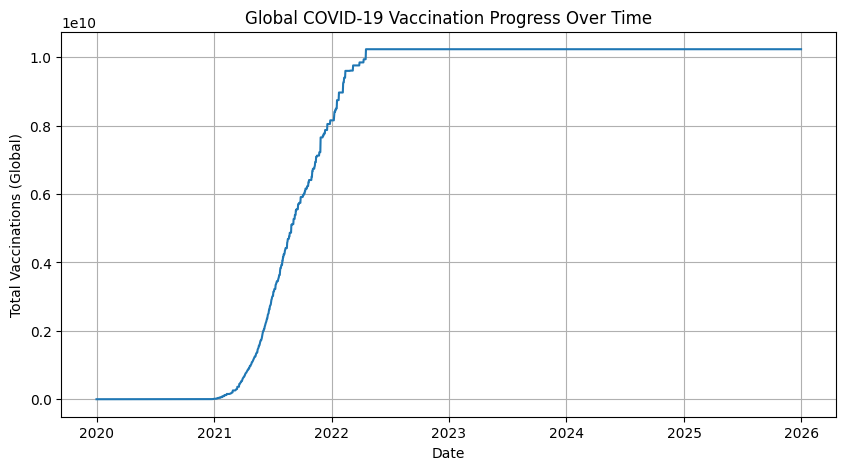

In [51]:
df = dws3.copy()

df["date"] = pd.to_datetime(df["date"], errors="coerce")

ts_global = (
    df.groupby("date")["total_vaccinations"]
    .sum()
    .reset_index()
    .sort_values("date")
)
ts_global["total_vaccinations_fixed"] = ts_global["total_vaccinations"].cummax()

plt.figure(figsize=(10, 5))
plt.plot(ts_global["date"], ts_global["total_vaccinations_fixed"])
plt.xlabel("Date")
plt.ylabel("Total Vaccinations (Global)")
plt.title("Global COVID-19 Vaccination Progress Over Time")
plt.grid(True)
plt.show()


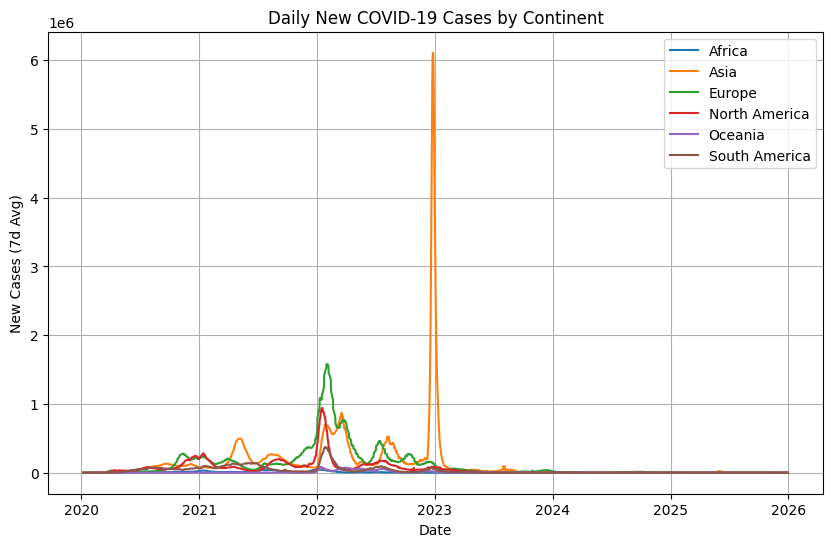

In [52]:
ts_continent = (
    dws1.groupby(["continent", "date"])[["new_cases", "new_deaths"]]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))

for c in ts_continent["continent"].unique():
    sub = ts_continent[ts_continent["continent"] == c].copy()
    sub["new_cases_7d"] = sub["new_cases"].rolling(7).mean()
    plt.plot(sub["date"], sub["new_cases_7d"], label=c)

plt.xlabel("Date")
plt.ylabel("New Cases (7d Avg)")
plt.title("Daily New COVID-19 Cases by Continent")
plt.legend()
plt.grid(True)
plt.show()


6. How have testing capacities affected case detection and positivity rates over the years?


In [53]:
df_q6 = dws3[
    ["total_tests", "new_cases", "positive_rate"]
].dropna()
df_q6 = df_q6[df_q6["total_tests"] < 1e9]

In [54]:
corr_tests_cases = df_q6["total_tests"].corr(df_q6["new_cases"])
corr_tests_pos   = df_q6["total_tests"].corr(df_q6["positive_rate"])

print("Q6 Correlation Analysis")
print(f"Correlation between total tests and new cases     : {corr_tests_cases:.4f}")
print(f"Correlation between total tests and positive rate : {corr_tests_pos:.4f}")


Q6 Correlation Analysis
Correlation between total tests and new cases     : 0.3463
Correlation between total tests and positive rate : -0.0337


In [55]:
X_cases = df_q6[["total_tests"]]
y_cases = df_q6["new_cases"]

y_cases_log = np.log1p(y_cases)

model_cases = LinearRegression()
model_cases.fit(X_cases, y_cases_log)

y_pred_cases = model_cases.predict(X_cases)
r2_cases = r2_score(y_cases_log, y_pred_cases)

print("Linear Regression (Log): Testing v.s New Cases")
print(f"Coefficient (slope): {model_cases.coef_[0]:.6f}")
print(f"Intercept          : {model_cases.intercept_:.2f}")
print(f"R² Score (log)     : {r2_cases:.4f}")


Linear Regression (Log): Testing v.s New Cases
Coefficient (slope): 0.000000
Intercept          : 4.97
R² Score (log)     : 0.0782


In [56]:
X_pos = df_q6[["total_tests"]]
y_pos = df_q6["positive_rate"]

y_pos_log = np.log1p(y_pos)

model_pos = LinearRegression()
model_pos.fit(X_pos, y_pos_log)

y_pred_pos = model_pos.predict(X_pos)
r2_pos = r2_score(y_pos_log, y_pred_pos)

print("Linear Regression (Log): Testing v.s Positive Rate")
print(f"Coefficient (slope): {model_pos.coef_[0]:.6f}")
print(f"Intercept          : {model_pos.intercept_:.2f}")
print(f"R² Score (log)     : {r2_pos:.4f}")


Linear Regression (Log): Testing v.s Positive Rate
Coefficient (slope): -0.000000
Intercept          : 1.91
R² Score (log)     : 0.0004


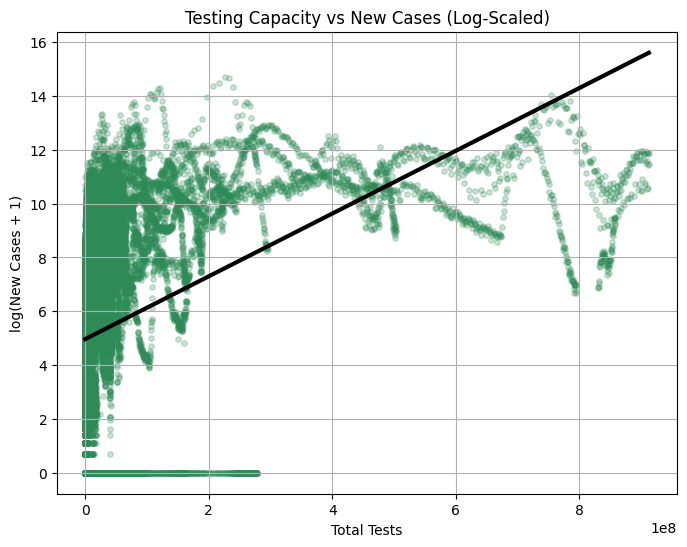

In [57]:
order = np.argsort(X_cases.values.flatten())
X_sorted = X_cases.values.flatten()[order]
y_sorted = y_pred_cases[order]

plt.figure(figsize=(8, 6))

plt.scatter(X_cases, y_cases_log, alpha=0.25, s=15, color="seagreen")
plt.plot(X_sorted, y_sorted, color="black", linewidth=3)

plt.xlabel("Total Tests")
plt.ylabel("log(New Cases + 1)")
plt.title("Testing Capacity vs New Cases (Log-Scaled)")
plt.grid(True)
plt.show()


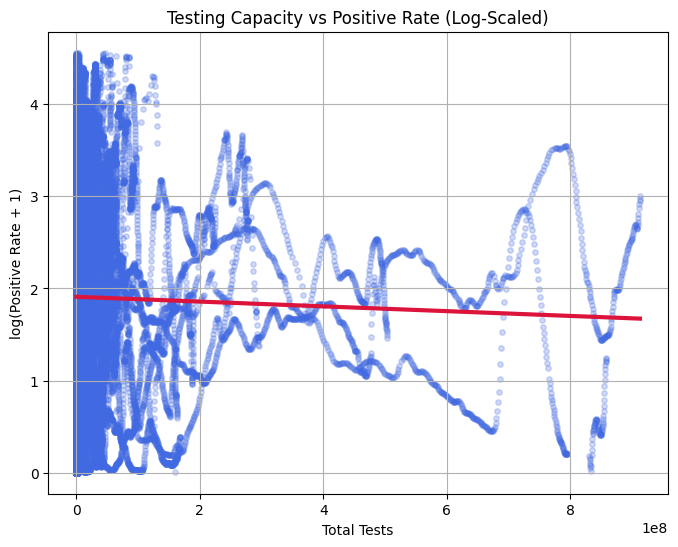

In [58]:
order = np.argsort(X_pos.values.flatten())
X_sorted = X_pos.values.flatten()[order]
y_sorted = y_pred_pos[order]

plt.figure(figsize=(8, 6))

plt.scatter(X_pos, y_pos_log, alpha=0.25, s=15, color="royalblue")
plt.plot(X_sorted, y_sorted, color="crimson", linewidth=3)

plt.xlabel("Total Tests")
plt.ylabel("log(Positive Rate + 1)")
plt.title("Testing Capacity vs Positive Rate (Log-Scaled)")
plt.grid(True)
plt.show()


In [59]:
print("Conclusion - Q6")

print(
    f"The Pearson correlation between total tests and new cases is {corr_tests_cases:.4f}, "
    f"indicating that increased testing capacity is associated with higher case detection."
)

print(
    f"The Pearson correlation between total tests and positive rate is {corr_tests_pos:.4f}, "
    f"indicating that expanded testing is associated with a lower test positivity rate."
)

print(
    f"Log-linear regression shows that testing capacity explains "
    f"{r2_cases*100:.2f}% of the variance in detected new cases and "
    f"{r2_pos*100:.2f}% of the variance in positivity rates."
)


Conclusion - Q6
The Pearson correlation between total tests and new cases is 0.3463, indicating that increased testing capacity is associated with higher case detection.
The Pearson correlation between total tests and positive rate is -0.0337, indicating that expanded testing is associated with a lower test positivity rate.
Log-linear regression shows that testing capacity explains 7.82% of the variance in detected new cases and 0.04% of the variance in positivity rates.


7. What are the differences in COVID-19 response effectiveness between high-income and low-income countries?

Q7 Average Comparison
              infection_rate  mortality_rate
income_group                                
High Income         0.218478        0.011968
Low Income          0.045453        0.017861


<Figure size 600x500 with 0 Axes>

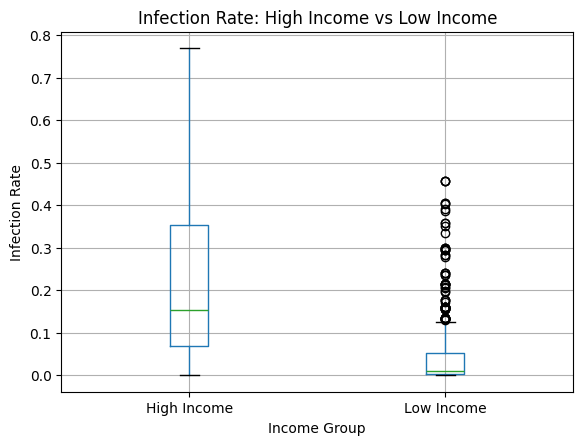

In [60]:
df_q7 = dws2[["country", "gdp_per_capita", "infection_rate", "mortality_rate"]].dropna()

gdp_threshold = df_q7["gdp_per_capita"].median()

df_q7["income_group"] = np.where(df_q7["gdp_per_capita"] >= gdp_threshold, "High Income", "Low Income")
group_stats = df_q7.groupby("income_group")[["infection_rate", "mortality_rate"]].mean()

print("Q7 Average Comparison")
print(group_stats)

plt.figure(figsize=(6, 5))
df_q7.boxplot(
    column="infection_rate",
    by="income_group",
    grid=True
)
plt.title("Infection Rate: High Income vs Low Income")
plt.suptitle("")
plt.xlabel("Income Group")
plt.ylabel("Infection Rate")
plt.show()


<Figure size 600x500 with 0 Axes>

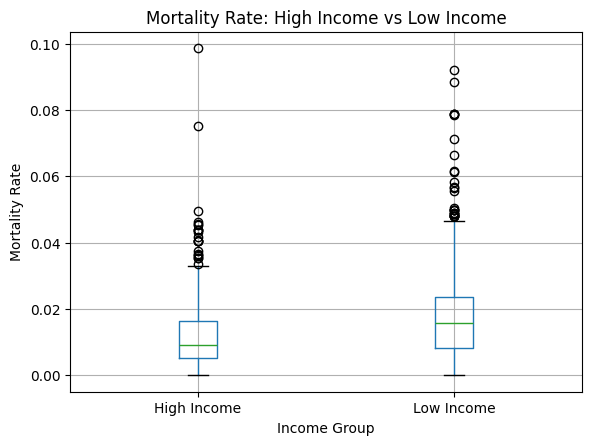

In [61]:
plt.figure(figsize=(6, 5))
df_q7.boxplot(
    column="mortality_rate",
    by="income_group",
    grid=True)
plt.title("Mortality Rate: High Income vs Low Income")
plt.suptitle("")
plt.xlabel("Income Group")
plt.ylabel("Mortality Rate")
plt.show()


Q7 - Conclusion<br>
High-incomes countries show higher infection rates, likely due to more extensive testing, higher mobility, and more complete reporting.<br>
In contrast, low-income countries have significantly higher mortality rates, even though their reported infection rates are lower.


8. Visualize and quantify the relationship between government interventions and pandemic control outcomes.

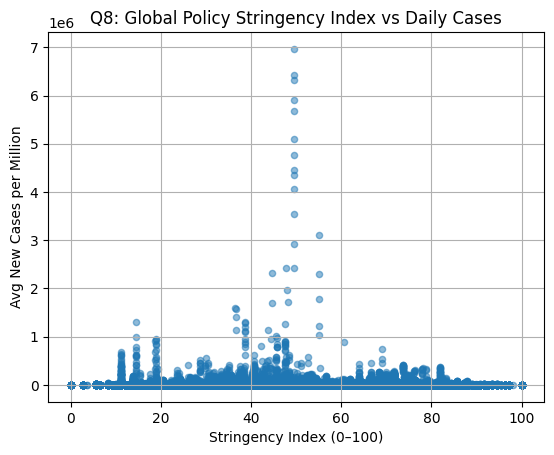

In [62]:
df_q8_plot = dws4[["stringency_index","new_cases"]].dropna()

y = df_q8_plot["new_cases"]
x = df_q8_plot["stringency_index"]

plt.figure()
plt.scatter(x, y, alpha=0.5, s=20)
plt.xlabel("Stringency Index (0–100)")
plt.ylabel("Avg New Cases per Million")
plt.title("Q8: Global Policy Stringency Index vs Daily Cases")
plt.grid(True)
plt.show()

Q8 - Conclusion<br>
Overall, there is no strong linear correlation between policy strictness and immediate case levels and can not make new cases zero. But we can see the new cases become lower and more stable with a more restrict policy.<br>

Strict policies are usually a reaction to rising cases, due to delayed of action.<br>